In [175]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [176]:
df = pd.read_csv('./data/spam.csv', encoding='latin-1')

In [177]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3097,ham,This is all just creepy and crazy to me.,NaN,NaN,NaN
5478,ham,No probably &lt;#&gt; %.,NaN,NaN,NaN
219,ham,Yeah you should. I think you can use your gt a...,NaN,NaN,NaN
2808,ham,Oh yeah I forgot. U can only take 2 out shoppi...,NaN,NaN,NaN
3526,ham,Should i send you naughty pix? :),NaN,NaN,NaN


In [178]:
df.shape

(5572, 5)

In [179]:
# 1. Data Cleaning
# 2. EDA (Exploratory Data Analysis)
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement

## 1. Data Cleaning

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [181]:
# droping last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [182]:
df.sample(5)

,v1,v2
2242,ham,Nope wif my sis lor... Aft bathing my dog then...
1584,ham,"Sorry, I'll call later"
2058,ham,Ugh fuck it I'm resubbing to eve
342,ham,Where u been hiding stranger?
2957,spam,U have a secret admirer. REVEAL who thinks U R...


In [183]:
#renaming the cols
df.rename(columns = {'v1':'target','v2':'text'},inplace = True)

In [184]:
df.sample(5)

,target,text
4287,ham,Hey mr whats the name of that bill brison book...
5511,ham,"ItÛ÷s reassuring, in this crazy world."
1791,ham,U havenåÕt lost me ill always b here 4u.i didn...
2976,ham,"Ok omw now, you at castor?"
1335,ham,"Sometimes we put walls around our hearts,not j..."


In [185]:
encoder = LabelEncoder()

In [186]:
df['target'] = encoder.fit_transform(df['target'])

In [187]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [188]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [189]:
# check for duplicate values
df.duplicated().sum()

403

In [190]:
# removing duplicate values
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

In [191]:
df.shape

(5169, 2)

## 2. EDA

In [192]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [193]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

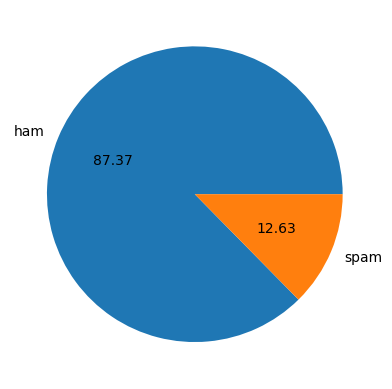

In [194]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'], autopct="%0.2f")
plt.show()

In [195]:
#data is imbalanced

In [196]:
import nltk

In [197]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dasam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [198]:
df['num_characters'] = df['text'].apply(len)

In [199]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [200]:
#num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [201]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [202]:
#num of sentence
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [203]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [204]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [205]:
#Ham messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [206]:
#Spam messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [207]:
import seaborn as sns

D:\Softwares\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Softwares\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

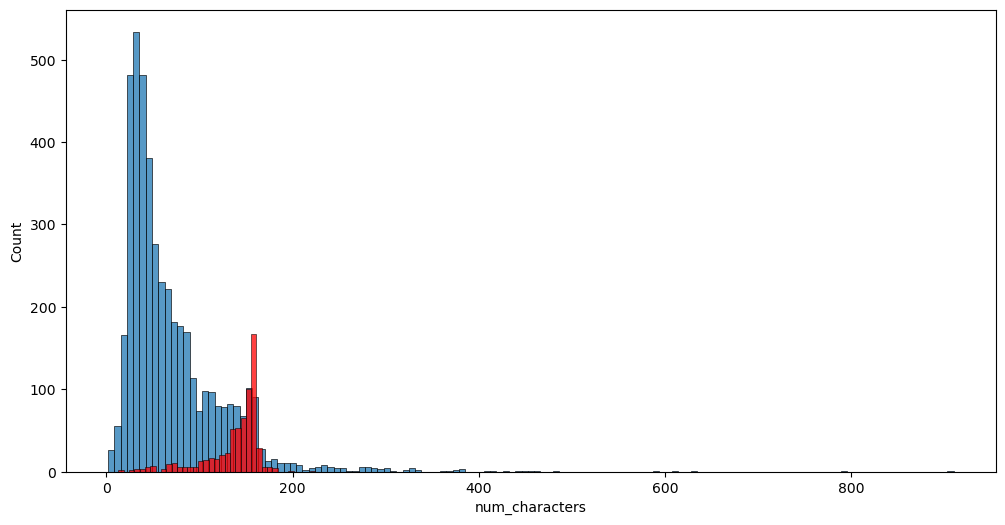

In [208]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

D:\Softwares\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Softwares\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

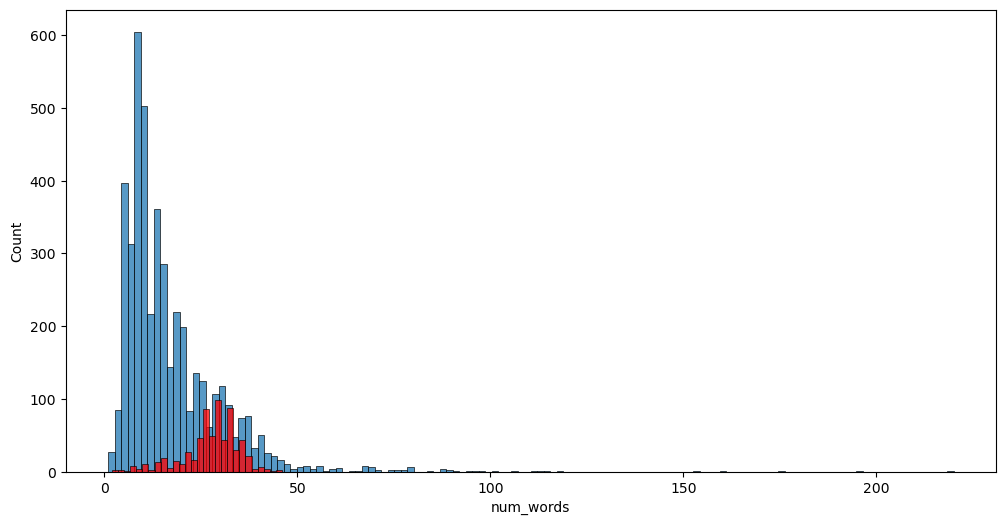

In [209]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

D:\Softwares\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Softwares\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Softwares\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


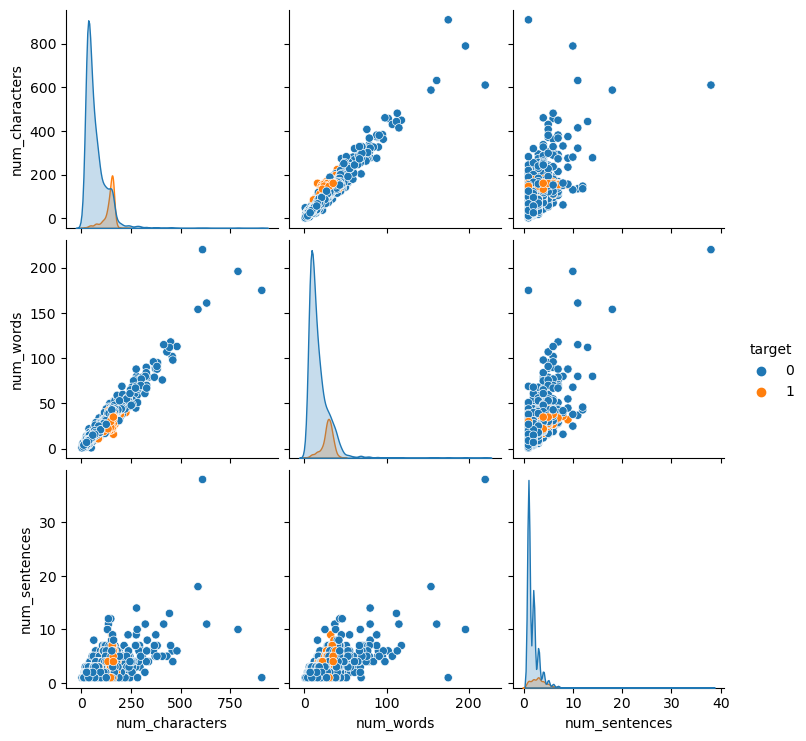

In [210]:
sns.pairplot(df,hue = 'target')

<Axes: >

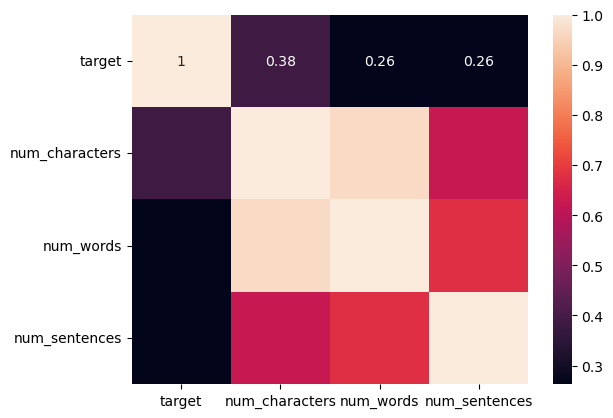

In [211]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

In [212]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


## 3. Data Preprocessing
- Lower Case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [213]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [214]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dasam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [215]:
def transformText(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [216]:
df['transformed_text'] = df['text'].apply(transformText)

In [217]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [218]:
from wordcloud import WordCloud
wc = WordCloud(width = 600, height = 600, min_font_size = 10, background_color = 'white')

In [219]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

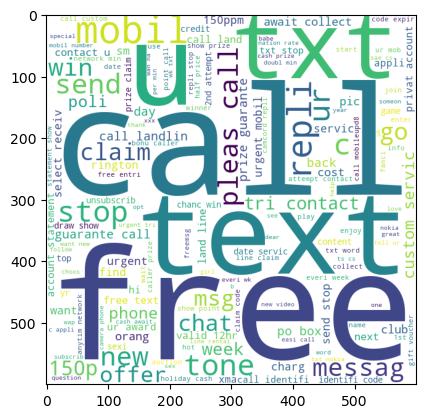

In [220]:
plt.imshow(spam_wc)

In [221]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

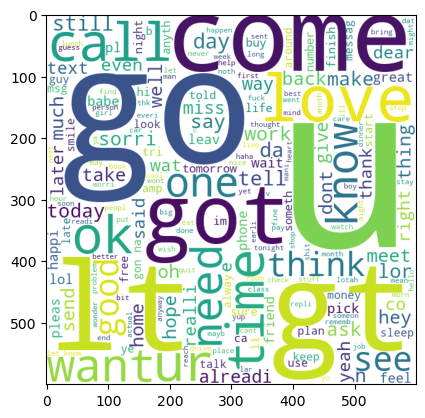

In [222]:
plt.imshow(ham_wc)

In [223]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [224]:
len(spam_corpus)

9939

In [225]:
from collections import Counter

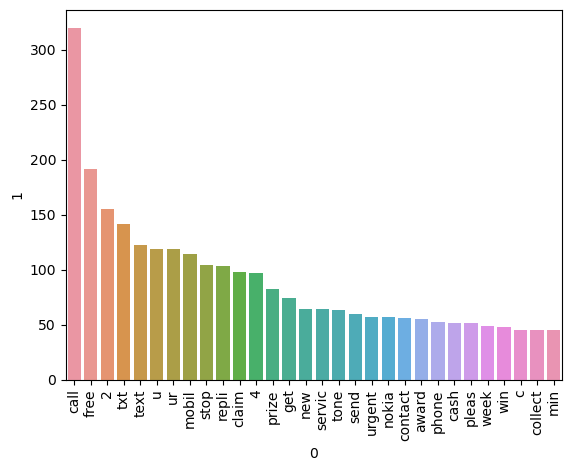

In [226]:
sns.barplot(x=0,y=1, data=pd.DataFrame(Counter(spam_corpus).most_common(30)))

plt.xticks(rotation = 'vertical')
plt.show()

In [227]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [228]:
len(ham_corpus)

35404

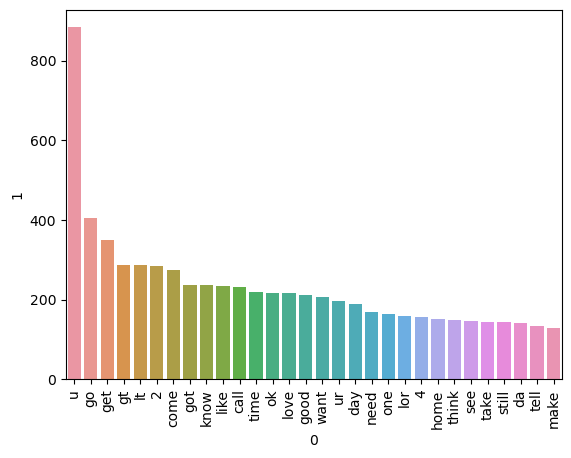

In [229]:
sns.barplot(x=0,y=1, data=pd.DataFrame(Counter(ham_corpus).most_common(30)))

plt.xticks(rotation = 'vertical')
plt.show()

## 4. Model Building

In [230]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tv = TfidfVectorizer(max_features = 3000)

In [231]:
X = tv.fit_transform(df['transformed_text']).toarray()

In [232]:
Y = df['target'].values

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

In [235]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [236]:
gnb.fit(X_train,Y_train)
Y_predG = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_predG))
print(confusion_matrix(Y_test,Y_predG))
print(precision_score(Y_test,Y_predG))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [237]:
mnb.fit(X_train,Y_train)
Y_predM = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_predM))
print(confusion_matrix(Y_test,Y_predM))
print(precision_score(Y_test,Y_predM))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [238]:
bnb.fit(X_train,Y_train)
Y_predB = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_predB))
print(confusion_matrix(Y_test,Y_predB))
print(precision_score(Y_test,Y_predB))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [239]:
#model improvement
# tfidvectorizer , added max_feature to 3000

## SMS Classifier


In [240]:
def classify(text):
    texttnf = transformText(text)
    #transformedtext = transformText(text)
    X_In = tv.transform([texttnf])
    
    Y_Out = mnb.predict(X_In)[0]
    if Y_Out == 1:
        print("Spam")
    else:
        print("Not Spam")

In [241]:
classify("Hello there i need to tell you something, ahaha please call me now")

Not Spam


In [242]:
classify("CALL For easy mOnEy 100000000$. JUst call 9826387272 ")

Not Spam


In [243]:
classify("07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow,,,")

Spam


In [244]:
classify("Free Money, call 876554479 or click on www.mnhfuy.ks.mi/iuffvuycf")

Not Spam
